<a href="https://colab.research.google.com/github/aydinhv/Customer_Booking/blob/main/Customer_Booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

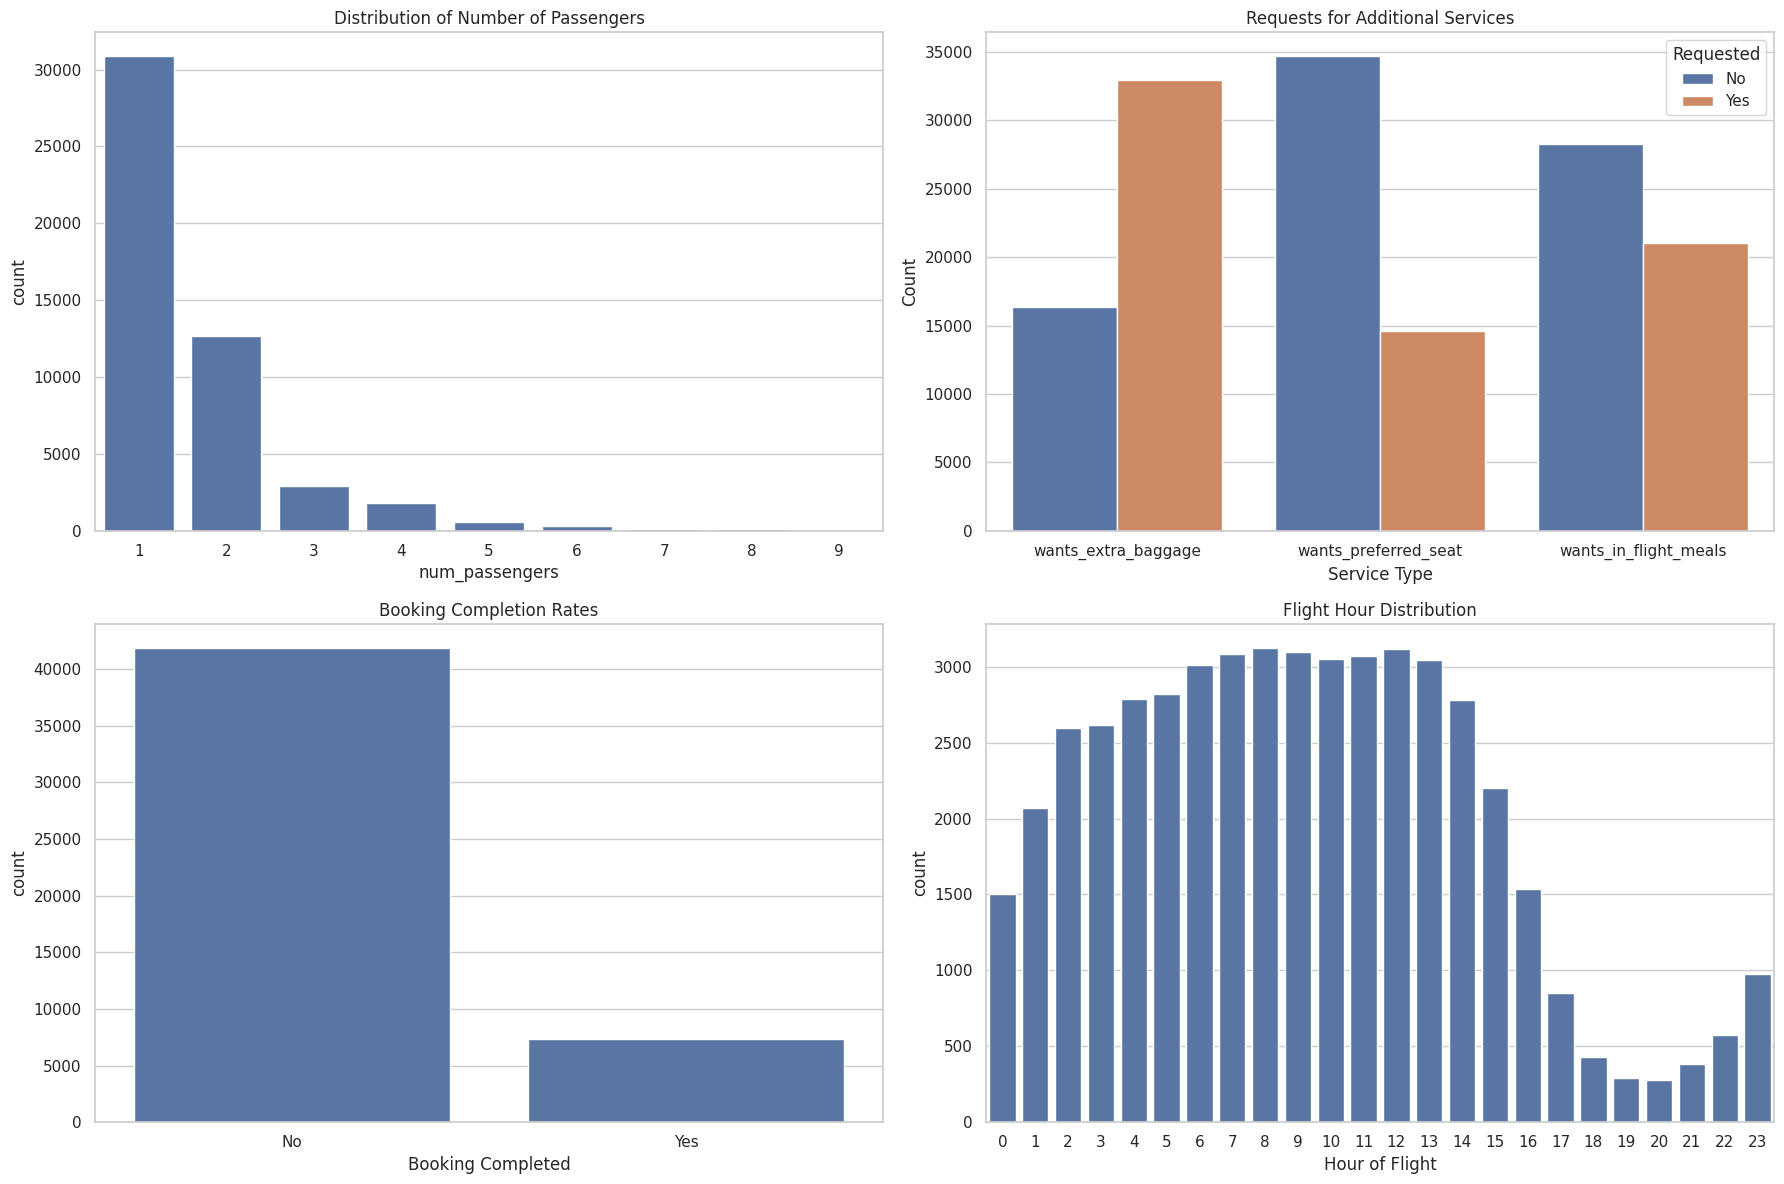

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv('customer_booking.csv', encoding='latin1')

# Remove duplicates
data_cleaned = data.drop_duplicates()

# Visualization setup
sns.set(style="whitegrid")
plt.figure(figsize=(18, 12))

# Distribution of Number of Passengers
plt.subplot(2, 2, 1)
sns.countplot(x='num_passengers', data=data_cleaned)
plt.title('Distribution of Number of Passengers')

# Additional Service Requests
plt.subplot(2, 2, 2)
services_data = data_cleaned[['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals']].melt()
sns.countplot(x='variable', hue='value', data=services_data)
plt.title('Requests for Additional Services')
plt.xlabel('Service Type')
plt.ylabel('Count')
plt.legend(title='Requested', labels=['No', 'Yes'])

# Booking Completion Rates
plt.subplot(2, 2, 3)
sns.countplot(x='booking_complete', data=data_cleaned)
plt.title('Booking Completion Rates')
plt.xlabel('Booking Completed')
plt.xticks([0, 1], ['No', 'Yes'])

# Flight Hour Distribution
plt.subplot(2, 2, 4)
sns.countplot(x='flight_hour', data=data_cleaned)
plt.title('Flight Hour Distribution')
plt.xlabel('Hour of Flight')

# Show plots
plt.tight_layout()
plt.show()

# Save cleaned data
data_cleaned.to_csv('cleaned_customer_booking.csv', index=False)


<ipython-input-15-2ec29a753d7d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[time_column] = pd.Categorical(data_cleaned[time_column], categories=days, ordered=True)


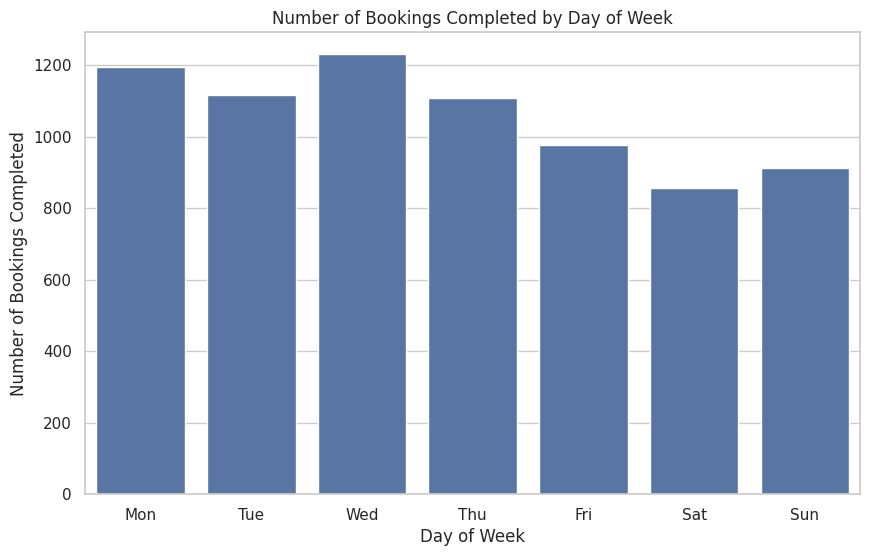

In [15]:
# This is a placeholder for your actual date or time-related column
time_column = 'flight_day'

# Convert the flight_day to an ordered categorical type if it's not numerical
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
data_cleaned[time_column] = pd.Categorical(data_cleaned[time_column], categories=days, ordered=True)

# Group by the time-related column and count the number of completed bookings
trend_data = data_cleaned.groupby(time_column)['booking_complete'].sum().reset_index()

# Plot the trend
plt.figure(figsize=(10, 6))
sns.barplot(x=time_column, y='booking_complete', data=trend_data)
plt.title('Number of Bookings Completed by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Bookings Completed')
plt.show()
